### Learn matplotlib

Refer to the [documentation](https://matplotlib.org/api/pyplot_api.html).

# Basic plotting

Plotting a vector:

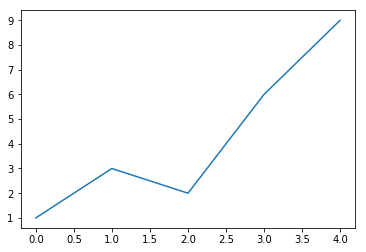

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([1, 3, 2, 6, 9])
plt.show()

## Plot lines with `hlines(x1, y1, y2)` and `vlines(x1, y1, y2)` 

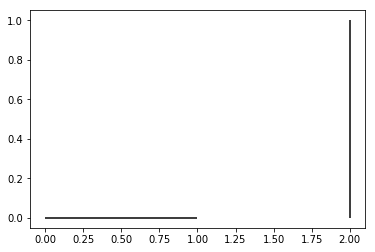

In [100]:
plt.hlines(0, 0, 1)
plt.vlines(2, 0, 1)
plt.show()

Plotting y over x, and add `title`, `axis`, `xlabel` and `ylabel`, also show `grid`:

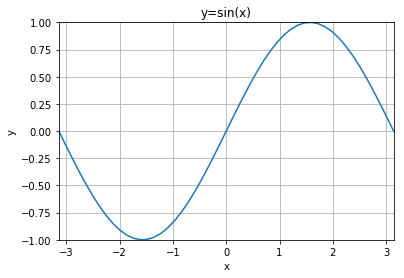

In [43]:
import numpy as np
x = np.linspace(-np.pi, np.pi)
ysin = np.sin(x)
plt.plot(x, ysin)
plt.title("y=sin(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.axis([-np.pi, np.pi, -1, 1])
plt.grid(True)
plt.show()


# Line Style and Color

- Colors: 
    - `r` red, `g` green, `b` blue, `c` cyan, `y` yellow, `k` black, `w` white, `m` magenta
    - Color names: `'green'`
    - Hex strings: `'#ab0098'`
    - RGB or RGBA tuples: `(23, 255, 10, 0.7)`
- Line type: `'-', '--', '-.', ':'`
- Marker type: `'.', ',''o', 'v', '^','<', '>', '*', '+', 'x' `...

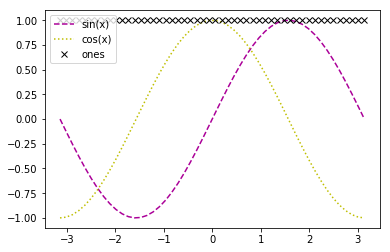

In [44]:
ycos = np.cos(x)
yone = np.ones(x.shape)
plt.plot(x, ysin, color='#ab0098', linestyle="--")
plt.plot(x, ycos, 'y:', x, yone, 'kx')
plt.legend(["sin(x)","cos(x)", "ones"], loc='upper left')
plt.show()

# Save a Figure

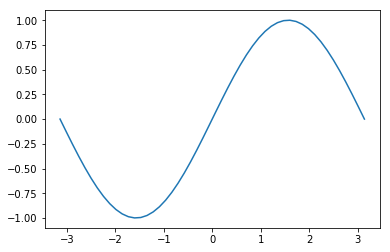

In [45]:
plt.plot(x, ysin)
plt.savefig("./images/my_sin_plot.png", transparent=True)

# Subplots

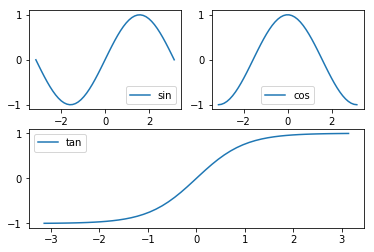

In [51]:
plt.subplot(2, 2, 1)
plt.plot(x, ysin, label="sin")
plt.legend(loc="lower right")
plt.subplot(2, 2, 2)
plt.plot(x, ycos, label="cos")
plt.legend(loc="best")
plt.subplot(2, 1, 2) # 2 rows, 1 column, 2nd subplot = bottom
plt.plot(x, np.tanh(x), label="tan")
plt.legend()
plt.show()

# Multiple Figures

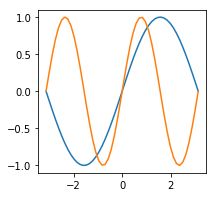

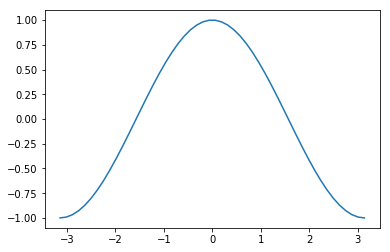

In [33]:
plt.figure(1, figsize=(3, 3))
plt.plot(x, ysin)

plt.figure(2)
plt.plot(x, ycos)

plt.figure(1)
plt.plot(x, np.sin(2*x))

plt.show()

# Writing Explicit Code

In Jupyter, we use the Pyplot's state machine to keep track of the currently active subplot. But it's recommended to write explicit code if we are writing a program for easier debugging and maintaining.

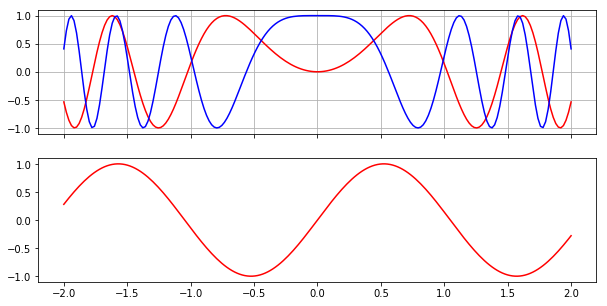

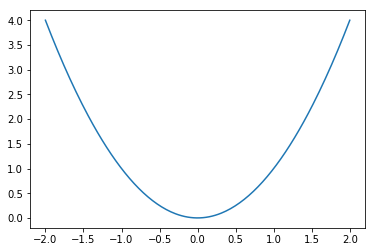

In [34]:
x = np.linspace(-2, 2, 200)
fig1, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)
fig1.set_size_inches(10,5)
line1, line2 = ax_top.plot(x, np.sin(3*x**2), "r-", x, np.cos(5*x**2), "b-")
line3, = ax_bottom.plot(x, np.sin(3*x), "r-")
ax_top.grid(True)

fig2, ax = plt.subplots(1, 1)
ax.plot(x, x**2)
plt.show()

# Drawing Text
Use `text(x, y, "Text")`

Kwargs:
- `fontsize=10`
- `color='b'`
- `horizontalalignment` or `ha=center` `left` or `right`
- `weight=heavy`
- `rotation=50`

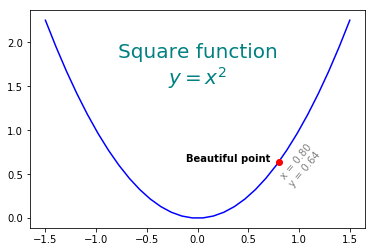

In [37]:
x = np.linspace(-1.5, 1.5, 30)
px = 0.8
py = px**2

plt.plot(x, x**2, "b-", px, py, "ro")

plt.text(0, 1.5, "Square function\n$y = x^2$", fontsize=20, color='teal', horizontalalignment="center")
plt.text(px - 0.08, py, "Beautiful point", ha="right", weight="heavy")
plt.text(px, py, "x = %0.2f\ny = %0.2f"%(px, py), rotation=50, color='gray')

plt.show()

Also, can use `annotate("text", xy=(px, py), xytext=(text_x, text_y))`

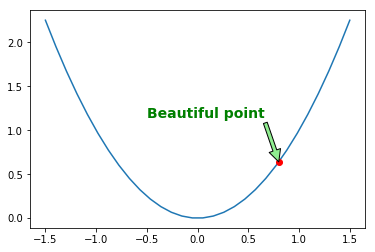

In [40]:
plt.plot(x, x**2, px, py, "ro")
plt.annotate("Beautiful point", xy=(px, py), xytext=(px-1.3,py+0.5),
                           color="green", weight="heavy", fontsize=14,
                          arrowprops={"facecolor": "lightgreen"})
plt.show()

# Non Linear Scales
`plt.yscale('option')`

options inslude: `linear`, `log`, `logit`, `symlog` ...

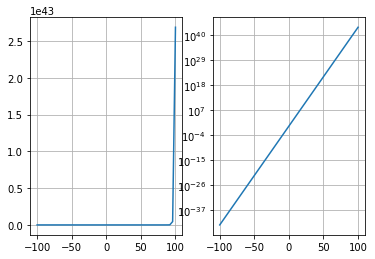

In [54]:
x = np.linspace(-100, 100)
y = np.exp(x)
plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x, y)
plt.yscale('log')
plt.grid(True)
plt.show()

# Ticks and Tickers

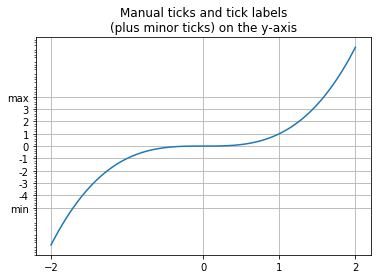

In [64]:
x = np.linspace(-2, 2, 100)
ax = plt.axes()
plt.plot(x, x**3)

plt.minorticks_on() # turn on minor ticks
ax.tick_params(axis='x', which='minor', bottom='off') 
# turn of minor ticks on x

ax.xaxis.set_ticks([-2, 0, 1, 2])
ax.yaxis.set_ticks(np.arange(-5, 5, 1))
ax.yaxis.set_ticklabels(["min", -4, -3, -2, -1, 0, 1, 2, 3, "max"])

plt.title("Manual ticks and tick labels\n(plus minor ticks) on the y-axis")
plt.grid(True)
plt.show()

# 3D Plots

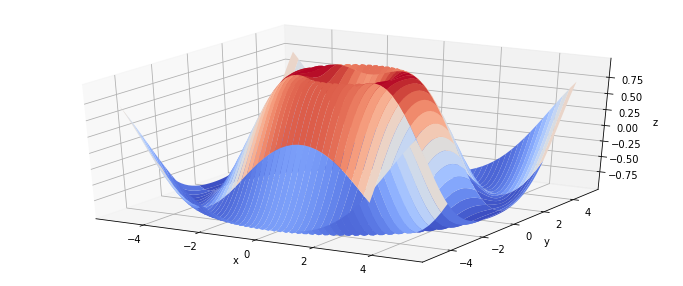

In [84]:
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-5, 5)
y = np.linspace(-5, 5)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

fig = plt.figure(figsize=(12, 5))
ax = plt.subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, cmap="coolwarm", rstride=10, cstride=1, linewidth=0.1)
# r/cstrid: Downsampling stride in x/y direction, default=1

plt.xlabel("x")
plt.ylabel("y")
ax.set_zlabel('z')
plt.show()

See a list of colormaps:

In [86]:
plt.colormaps()

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

## Make contour plot with `contourf`

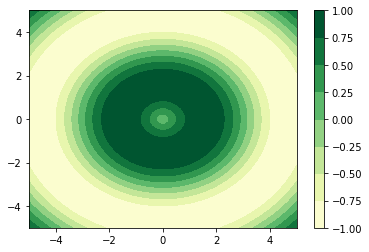

In [90]:
plt.contourf(X, Y, Z, cmap='YlGn')
plt.colorbar()
plt.show()

# Scatter Plot with `scatter(x,y)` 

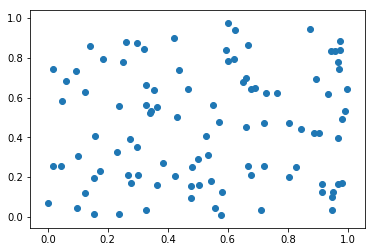

In [103]:
from numpy.random import rand
x, y = rand(2, 100)
plt.scatter(x, y)
plt.show()

Setting kwargs:
- scale: `s`
- color: `c`
- aplha: `alpha`

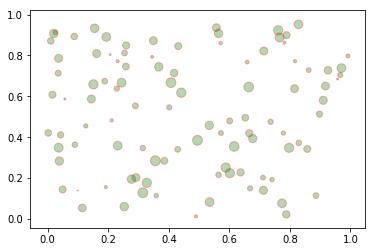

In [112]:
x, y = rand(2, 100)
scale = rand(1, 100)*100
plt.scatter(x, y, s=scale, c='green', alpha=0.3, edgecolors='red')
plt.show()

# Histograms with `hist(data, bins)`


See [the doc for hist()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html)

Change histogram types:
- histtype : {'bar', 'barstacked', 'step', 'stepfilled'}, optional


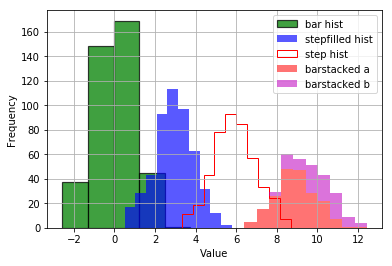

In [122]:
from numpy.random import randn
data1 = randn(400)
data2 = randn(500) + 3
data3 = randn(450) + 6
data4a = randn(200) + 9
data4b = randn(100) + 10

plt.hist(data1, bins=5, color='g', alpha=0.75, edgecolor='black', linewidth=1.2, label='bar hist') # default histtype='bar'
plt.hist(data2, color='b', alpha=0.65, histtype='stepfilled', label='stepfilled hist')
plt.hist(data3, color='r', histtype='step', label='step hist')
plt.hist((data4a, data4b), color=('r','m'), alpha=0.55, histtype='barstacked', label=('barstacked a', 'barstacked b'))

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()